# Reading Images from blob storage

In [1]:
import os
from azure.storage.blob import BlobServiceClient,ContainerClient, BlobClient
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
connect_str = os.environ['AZURE_STORAGE_CONNECTION_STRING']
container_name = os.environ['AZURE_STORAGE_CONTAINER_NAME']

### Reading images with metadata

In [3]:
def get_image_with_metadata_from_blob_storage(blob_name):
    try:
        
        connect_str = os.environ['AZURE_STORAGE_CONNECTION_STRING']
        container_name = os.environ['AZURE_STORAGE_CONTAINER_NAME']
        blob_service_client = BlobServiceClient.from_connection_string(connect_str)

        container_client = blob_service_client.get_container_client(container_name)

        blob_client = container_client.get_blob_client(blob_name)
        blob_data = blob_client.download_blob()

        metadata = blob_client.get_blob_properties().metadata

        return blob_data, metadata
    except Exception as e:
        print(f"Error getting image: {e}")
        return None, None
    

### download images from blob

In [4]:
def descarga_blob_data(blob_data, siMuestra = False, name = "temp.jpg"):
    
    if blob_data:
        with open(f"imagenes/{name}", "wb") as file:
            blob_data.readinto(file)
        print("Se descargó la imagen con éxito")
        if(siMuestra):
            temp = plt.imread(f"imagenes/{name}")
            
            plt.imshow(temp)
            plt.show()
    
            plt.imsave(f"imagenes/{name}", temp)
            
    else:
        print("Failed to retrieve the image.")
    return temp
    

### list all blobs on container

In [6]:
blob_service_client = BlobServiceClient.from_connection_string(conn_str=connect_str) 
container_client = blob_service_client.get_container_client(container_name)

blobnames = []

blob_list = container_client.list_blobs()
for i, blob in enumerate (blob_list):
    print(i, "[{}][INFO] > Blob name: {}".format(datetime.datetime.utcnow(), blob.name))
    blobnames.append(blob.name)



0 [2024-07-24 18:22:28.567976][INFO] > Blob name: Cliente1
1 [2024-07-24 18:22:28.567976][INFO] > Blob name: Cliente1/Refrigerador1
2 [2024-07-24 18:22:28.567976][INFO] > Blob name: Cliente1/Refrigerador1/RefrigeradorPepsiCo1__2024-07-10_11:50:07_1.jpg
3 [2024-07-24 18:22:28.567976][INFO] > Blob name: Cliente1/Refrigerador1/RefrigeradorPepsiCo1__2024-07-10_11:50:08_3.jpg
4 [2024-07-24 18:22:28.567976][INFO] > Blob name: Cliente1/Refrigerador1/RefrigeradorPepsiCo1__2024-07-10_11:50:09_1.jpg
5 [2024-07-24 18:22:28.567976][INFO] > Blob name: Cliente1/Refrigerador1/RefrigeradorPepsiCo1__2024-07-10_11:50:10_3.jpg
6 [2024-07-24 18:22:28.567976][INFO] > Blob name: Cliente1/Refrigerador1/RefrigeradorPepsiCo1__2024-07-10_11:50:11_1.jpg
7 [2024-07-24 18:22:28.567976][INFO] > Blob name: Cliente1/Refrigerador1/RefrigeradorPepsiCo1__2024-07-10_11:50:12_3.jpg
8 [2024-07-24 18:22:28.567976][INFO] > Blob name: Cliente1/Refrigerador1/RefrigeradorPepsiCo1__2024-07-10_11:50:13_1.jpg
9 [2024-07-24 18:22:2

Se descargó la imagen con éxito


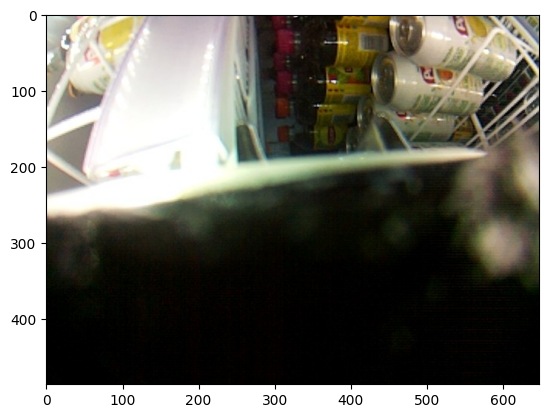

{}


In [7]:
blob_data, metadata = get_image_with_metadata_from_blob_storage(blobnames[1624])
descarga_blob_data(blob_data=blob_data, siMuestra=True)
print(metadata)

### Delete all the blobs from the container

In [87]:
def delete_all_blobs(connection_string, container_name):
    try:
        
        blob_service_client = BlobServiceClient.from_connection_string(connection_string)
        container_client = blob_service_client.get_container_client(container_name)
        blob_list = container_client.list_blobs()
        for blob in blob_list:
            container_client.delete_blob(blob)

        print("All blobs in the container have been deleted.")

    except Exception as ex:
        print('Exception:')
        print(ex)


In [101]:
delete_all_blobs(connect_str, container_name)

All blobs in the container have been deleted.
